## Support Vector Machine (SVM) from Scratch

### SVM Basic Concepts and Equations

- **Hyperplane**: A decision boundary used to separate data points from different classes in a feature space. In an n-dimensional space, the hyperplane can be represented as: $$ w \cdot x + b = 0 $$ where \( w \) is the weight vector, \( x \) is the input vector, and \( b \) is the bias term.

- **Margin**: The distance between the hyperplane and the nearest data points from each class. SVM aims to maximize this margin for optimal separation.

- **Optimization Problem**: The goal of SVM is to solve the following optimization problem to find the optimal hyperplane: $$ \min_{w, b} \frac{1}{2} \|w\|^2 $$ subject to: $$ y_i (w \cdot x_i + b) \geq 1 \quad \forall i $$ where \( y_i \) is the class label of the \( i \)-th data point, and \( x_i \) is the \( i \)-th data point.

### Objective Function with L2 regularisation (Optimized version)
The objective function of a linear SVM with L2 regularization is given by: $$ \min_{w, b} \left[ \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \max(0, 1 - y_i (w \cdot x_i - b)) \right] $$ where:
- \( w \) is the weight vector.
- \( b \) is the bias term.
- \( C \) is the regularization parameter.
- \( $y_i$ \) are the labels {-1, 1}.
- \( $x_i$ \) are the feature vectors.
- \( n \) is the number of samples.

### Hinge Loss
The hinge loss for a single sample is given by: $$ L_i(w, b) = \max(0, 1 - y_i (w \cdot x_i - b)) $$

### Gradient of the Objective Function
To minimize the objective function, we use gradient descent. We need the gradients of the objective function with respect to \( w \) and \( b \).

- #### Gradient with Respect to \( w \)
The gradient of the regularization term is: $$ \nabla_{w} \left( \frac{1}{2} \|w\|^2 \right) = w $$
<br>
The gradient of the hinge loss term is:
$$
\nabla_{w} L_i(w, b) =
\begin{cases}
0 & \text{if } y_i (w \cdot x_i - b) \geq 1 \\
-y_i x_i & \text{if } y_i (w \cdot x_i - b) < 1
\end{cases}
$$
<br>

Combining these, the total gradient with respect to \( w \) is:
$$ \nabla_{w} J(w, b) = w + C \sum_{i=1}^n \nabla_{w} L_i(w, b) $$

For a single sample update (stochastic gradient descent), this becomes:
$$ \nabla_{w} J(w, b) =
\begin{cases}
w & \text{if}  y_i (w \cdot x_i - b) \geq 1 \\
w - C y_i x_i & \text{if} y_i (w \cdot x_i - b) < 1
\end{cases}
$$

- #### Gradient with Respect to \( b \)
The gradient of the hinge loss term with respect to \( b \) is:
$$
\nabla_{b} L_i(w, b) =
\begin{cases}
0 & \text{if } y_i (w \cdot x_i - b) \geq 1 \\
y_i & \text{if } y_i (w \cdot x_i - b) < 1
\end{cases}
$$
<br>

For a single sample update, this becomes:
$$ \nabla_{b} J(w, b) =
\begin{cases}
0 & \text{if}  y_i (w \cdot x_i - b) \geq 1 \\
-y_i & \text{if} y_i (w \cdot x_i - b) < 1
\end{cases}
$$

### Weight and Bias Update Equations
Using gradient descent, we update the weights and bias by moving in the direction of the negative gradient:

1. **Condition is met (correct classification with a margin):**

$$ y_i (w \cdot x_i - b) \geq 1 $$

Update rule for weights: $$ w \leftarrow w - \eta \nabla_{w} J(w, b) = w - \eta (2 \lambda w) $$

2. **Condition is not met (misclassification or within the margin):**

$$ y_i (w \cdot x_i - b) < 1 $$
<br>

Update rule for weights: $$ w \leftarrow w - \eta \nabla_{w} J(w, b) = w - \eta (2 \lambda w - y_i x_i) $$

Update rule for bias: $$ b \leftarrow b - \eta \nabla_{b} J(w, b) = b - \eta (-y_i) = b + \eta y_i $$

Let's implement the SVM algorithm from scratch using Python.

In [23]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Preparing the data:

In [24]:
# Load the dataset from the data.csv file given in the folder using pandas
data = pd.read_csv('/content/data (1).csv')

# Dataset has features in columns 'feature1', 'feature2' and the target in 'target'
X = data[['feature1', 'feature2']].values
y = data['target'].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Implement the missing functions in the SVM class provided below and display the model's accuracy.

In [25]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        y = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
              condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
              if condition:
                self.w -= self.lr * (2 * self.lambda_param * self.w)
              else:
                self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                self.b -= self.lr * y[idx]
                #check for the condition and do weight and bias updation specified above

    def predict(self, X):
      return np.sign(np.dot(X, self.w) - self.b)
        # predict to test SVM on X_test

# Initialize and train the SVM
train = SVM()
train.fit(X, y)

# Predictions
prediction = train.predict(X)

# Evaluate the performance using accuracy_score function imported from sklearn.metrics
accuracy = accuracy_score(y, prediction)
print("Accuracy:", accuracy*100,"%")

Accuracy: 100.0 %


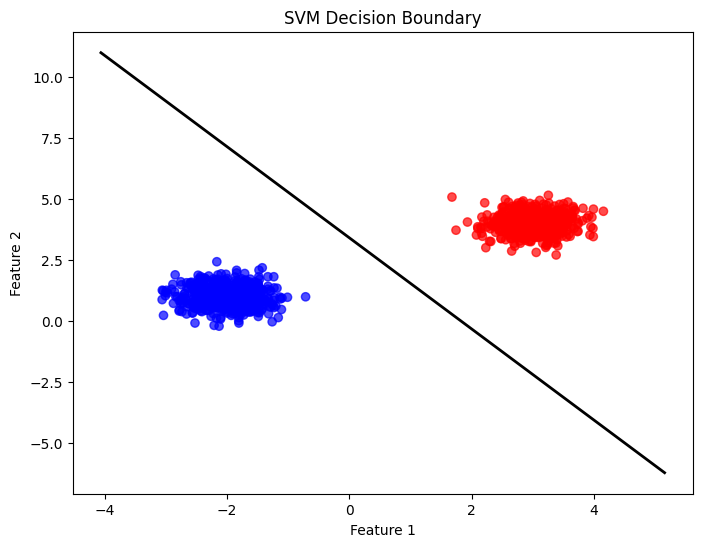

In [31]:
def plot_hyperplane(X, y, model):
  plt.figure(figsize=(8, 6))
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  x_vals = np.linspace(x_min, x_max, 100)
  y_vals = -(train.w[0] * x_vals - train.b) / train.w[1]

  plt.plot(x_vals, y_vals, 'k-', linewidth=2)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('SVM Decision Boundary')
  plt.show()

plot_hyperplane(X, y, model)